# Correlation and Causation

Variables that affect each other necessarily have some degree of correlation with each other.

However, **correlation is not causation**. Just because two vectors of measurements correlate together doesn't mean one causes the other, or vice versa. Here's a few examples:

![](../assets/causation-correlation.jpeg)

### Things going up over time

![](../assets/autism_organic_foods.png)

Autism gets diagnosed more over time as psychiatry evolves and parents become aware of the condition. Organic foods are growing in popularity for unrelated reasons like change in food supply chain and the healthy eating movement.

Both things going up independently don't mean they're related to each other.

### Things going down over time

![](../assets/ie_murder.png)

IE is disappearing because it's a bad browser. Murders are going away because of social progress.

To think about it, maybe internet explorer is also going away because of social progress.

**Bad Data Viz**

Notice the evil truncated Y axis in this graph to make things look more related than they are. Shame on whoever made that.


# A partial solution: first-differences

If multiple times series have trends, then they'll necessarily correlate with each other. The solution is to take the [time differences](https://people.duke.edu/~rnau/411diff.htm) to only look at the % change since last period:

<AxesSubplot:>

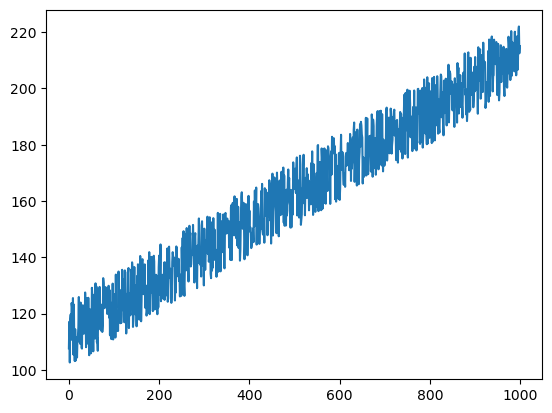

In [10]:
import numpy as np
import pandas as pd


s1 = pd.Series(np.linspace(100, 200, 1000) + (np.random.rand(1000) * 25))
s1.plot()

<AxesSubplot:>

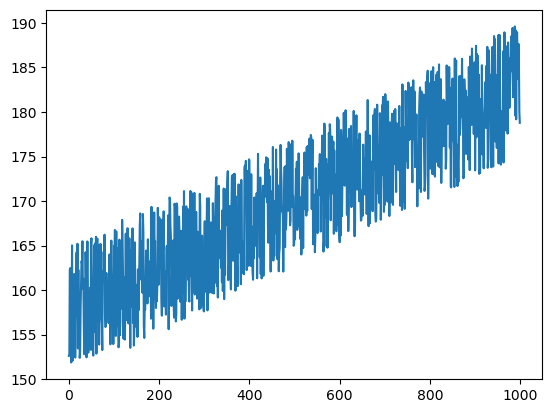

In [2]:
s2 = pd.Series(np.linspace(150, 175, 1000) + (np.random.rand(1000) * 15))
s2.plot()

In [3]:
df = pd.DataFrame({'s1': s1, 's2': s2})
df.corr()

,s1,s2
s1,1.000000,0.828591
s2,0.828591,1.000000


These two time series have nothing to do with each other except they both have trends going up.

Yet they correlate 83% to each other.

To fix it, we do the first difference:

$$y_{diff} = y_t - y_{t-1}$$

<AxesSubplot:>

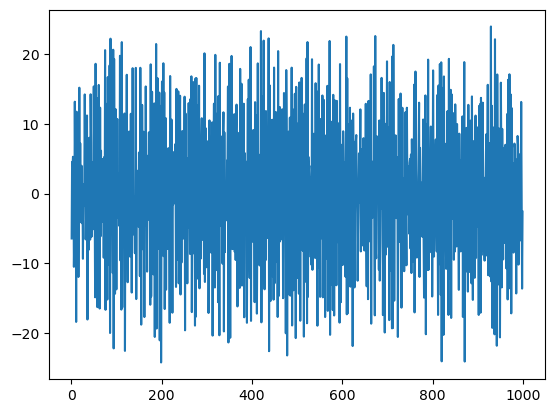

In [4]:
df['s1_diff'] = df.s1 - df.s1.shift()
df['s2_diff'] = df.s2 - df.s2.shift()

df.s1_diff.plot()

This is just the movement in the series without the time trend.

In [5]:
df.corr()

,s1,s2,s1_diff,s2_diff
s1,1.000000,0.828591,0.172900,-0.015863
s2,0.828591,1.000000,-0.034617,0.344931
s1_diff,0.172900,-0.034617,1.000000,-0.086417
s2_diff,-0.015863,0.344931,-0.086417,1.000000


This captured the true correlation (~0) between the series

# Endogeneity

A second cause of false correlations is when two things correlate together because they're both linked to a third variable.

This is also called **omitted variable bias**.

It's hard to identify effects in social sciences because so many variables are tied together. 

### Good examples

Here are a few examples of great papers by [David Card](https://en.wikipedia.org/wiki/David_Card).

- **Does immigration impact native wages?** This is normally impossible to measure, because of all the other variables  tied to both immigration level and wage.

However, in 1980, Fidel Castro implemented the [Mariel Boatlift](https://en.wikipedia.org/wiki/Mariel_boatlift) which raised the city of Miami's population by 7% overnight, all of whom are "low skill" (low education, low salaried) immigrants.

Since any change in wage in Miami after this huge instant influx of immigrants can be directly tied to the level of immigration, we can bypass the "correlation is not causation" problem by studying this.

I highly recommend you read the paper (it's short and not technically forbidding). It finds **no change in wages in low skill population from low skill immigration**, a point that some politicians clearly have missed.

- **Does the minimum wage cause unemployment?** This is also normally impossible to measure short of being a dictator and forcing random minimum wages on stores.

In thee 1990s, New Jersey increased its minimum wage by 20% overnight, while the neighbour Pennsylvania didn't. By comparing changes in employment **between the two**, we can get the effect of minimum wage on unemployment.

Much like the Mariel Boatlift paper, this shows a counterintuitive result: this small change in minimum wage **increased employment**. It's important not to generalize this result too much, though -- it's possible for larger changes in minimum wage to cause unemployment, and the results depend on the local level of minimum wage before the change.

# Difference-in-differences

A common way to estimate a quantity is to have a **control group** (Pennsylvania) and look at it against a **test group** (new jersey). Then, the size of an effect is the [**difference-in-differences**](https://en.wikipedia.org/wiki/Difference_in_differences):

![](../assets/diffndiff.png)

Here, the difference between "what would have happened if you were in the control group" and "what really happened" is the treatment effect.

# Discontinuities

"Discontinuities" are your best friend when trying to bypass the "correlation is not causation" problem.

[Here is a fun list of discontinuities](http://danluu.com/discontinuities/).

The Minimum wage story from above does the same:

![](../assets/mwage.png)


Similarly with [this mask mandate study from the CDC](https://www.cdc.gov/mmwr/volumes/69/wr/mm6947e2.htm?s_cid=mm6947e2_w) which shows this plot:

![](https://www.cdc.gov/mmwr/volumes/69/wr/figures/mm6947e2-F.gif)